<a href="https://colab.research.google.com/github/SSManso/Neural_Signals_and_Computation_ssanh27_GitHUB/blob/main/ssanch27_problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1
### Name: Sergio Sanchez
### JHID: ssanch27
### language: Python

Before we start, I want to highlight the fact that:
- All images are seen in grayscale, as the .tiff files produce a set of frames with 1 channel each. I have chosen to do grayscale instead of other colormap as it is more truthful to the 1 channel representation, although in some cases it might be a bit more difficult to see correctly the activity in the image.
- The comments that are wanted regarding "What problem is being solved in each block" and "what the approach is for that problem" are included inside the .py files of each exercise, as Python comments. In this .ipynb file the markdown cells will only include the answer to the questions (in blue) from each problem, not the approach to solve it. Again, those can be found inside each .py file.
- Due to having to run the file in Colab, some visualisations can be affected, highlighting the lack of the animation asked for in problem 1 part A), as Colab doesn't produce the animation when calling the function. In the repo, I have included a screenshot of the animation running locally on my computer to prove it works.

In [1]:
# Load repo
! git clone https://github.com/SSManso/Neural_Signals_and_Computation_ssanh27_GitHUB

# Change directory
import os
os.chdir("Neural_Signals_and_Computation_ssanh27_GitHUB")

Cloning into 'Neural_Signals_and_Computation_ssanh27_GitHUB'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 21 (delta 6), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (21/21), 123.26 KiB | 5.87 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [2]:
# Mount drive
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
except:
    COLAB = False

# Read files from drive
import tifffile as tiffio
TIF_FILE_1 = r"TEST_MOVIE_00001-small-motion.tif"
TIF_FILE_2 = r"TEST_MOVIE_00001-small.tif"
np_file_1 = tiffio.imread(r'/content/drive/My Drive' + os.sep + TIF_FILE_1)
np_file_2 = tiffio.imread(r'/content/drive/My Drive' + os.sep + TIF_FILE_2)

Mounted at /content/drive


# PROBLEM 1

PART A
Type: <class 'numpy.ndarray'>
Shape: (500, 491, 491)
Range of values: [0.0 - 3533.0]


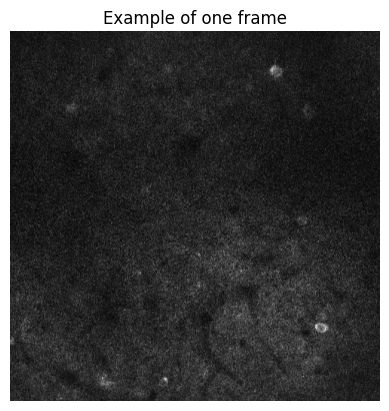

The animation doesn't show properly in Colab. If you run the file locally the animation will appear.
In the repo there is available one screenshot showing that the animation works locally.

PART B


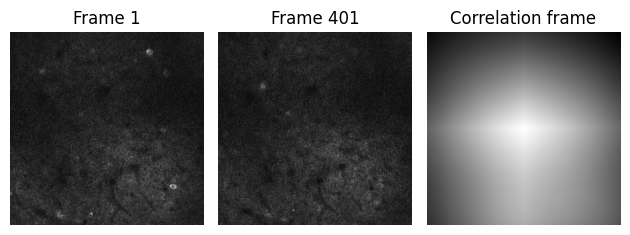

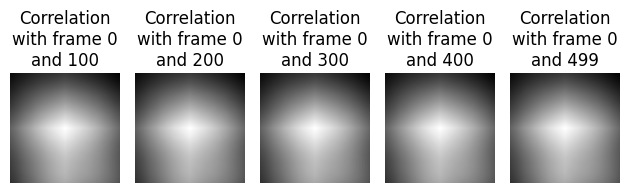

Region with max correlation for offset 100 around (246,246)
Region with max correlation for offset 200 around (245,245)
Region with max correlation for offset 300 around (245,245)
Region with max correlation for offset 400 around (245,245)
Region with max correlation for offset 499 around (245,245)


In [3]:
# Load problem function
from ssanch27_problem_1_exercise_1 import run_problem_1

# Run problem function
run_problem_1(np_file_1, COLAB)

- Part A)

We can see the video "wiggle" because of the movement, in the following problems we will use a .tiff file that has a correction to account for movement, making a "still" frame that changes over time.

- Part B)

The higher the correlation, the more significant are the similar points across 2 frames. So a higher correlation at some coordinates means that the frame has experienced less movement in that part of the frame, and that is what we are trying to look for here.

Doing it for 2 frames, we can see how the correlation simulates a 2D Gaussian projection, being highest in the center of the frame. To test if this is a result of these individual frames or not, I tested several combinations of frames, each pair with the reference frame (1st frame) and with a frame of the file, increasing each iteration by 100 frames of offset.

We still see the same distribution and see the almost same pixel of peak correlation, around (245,245), so the center of the image. That means that over the center of the image, the movement of the video is more controlled than in other parts of the images, which creates more differences across frames.

This makes sense as probably the recording method was set to the center of the frame, and the cells can exhibit some "wiggle" behaviour, so as you get further from that fixed point, the correlation might decrease.

# PROBLEM 2

PART A


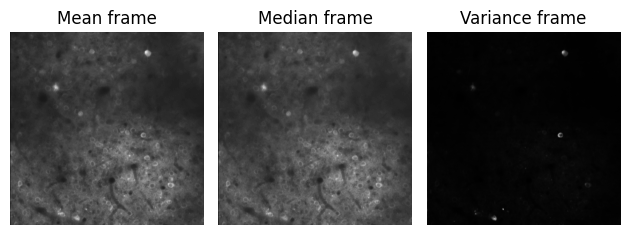

Part B
The 2 proposed statistics are Standard Deviation and Max Value Projection


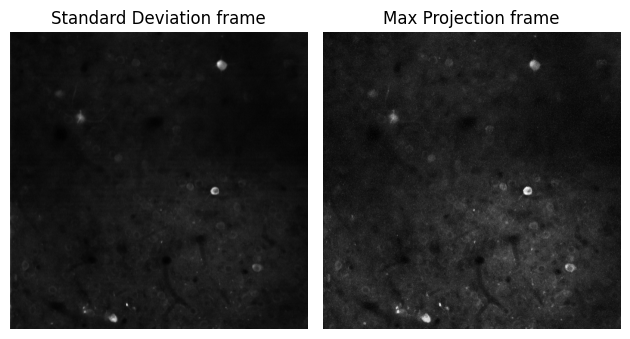

In [4]:
# Load problem function
from ssanch27_problem_2_exercise_1 import run_problem_2

# Run problem function
mean_frame, median_frame, variance_frame = run_problem_2(np_file_2)

- Part A)

We can see how mean and median images are very similar (which makes sense given the definition of each statistic and the distribution of the frame's intensities) and the variance frame is more different.

The mean/median summary frames give information both about static visible cells that don't change over frames/time (background noise), and those that change (cells of interest with activity). For example for the mean frame, if you remain always around the same, you will have that value of the summary frame, that is why the background is not removed. For cells with activity, if the activity was long/intense enough to survive the mean process, it will be shown in the image as a very bright spot (which we actually see several of). The problem might be very sporadic and not as intense activations, that might get lost in the average process. For the median image, the conclusions are similar.

However, for the variance, we are looking at a measure of change, so it removes easily the background of the image without cell activation because it is constant through frames. This method allows us to see very easily the spots of the frame that experience at some time cell activation, as they have significantly higher variance than the rest of the image. In this case, the visible cells are more securely the ones that exhibit cell activation.

- Part B)

I would expect a good summary image to capture easily changes over time, and remove efficiently pixels with constant values over time. That way you can remove the background noise of cells without activation, and keep only the part of the image we want to (cells that display activation).

I think maybe standard deviation could be a good additional statistic, as it is very similar to the variance but in units of the frame, which could be more helpful in understanding the values we see in the image.

After seeing the results, I must say that variance overall gives a better approach than standard deviation, although standard deviation does a decent job of removing the background and highlighting the cells (just in a less aggressive way than variance due to variance having a square factor). I would say I was right about being a good statistic for summary frames, but variance behaves better in my opinion.

Another statistic I have thought of to solve the problems we saw in the mean/median (a pulse of activation that is shorter might get lost when taking the average across all frames), is taking the maximum of each pixel across all frames (Max Projection).

After seeing the results, I must say that I was expecting a better result for this summary frame. I thought that the difference in value between the peak intensity of cell activation and the constant background cells would be high enough so that in the range of values the background would get easily removed, for example as in variance. It is true that in my opinion, this behaves better than the mean frame for example, as it shows a higher contrast between cell activation and background, but once again is not as good as the previous variance approach.

Due to all of these considerations, for the next problems I will continue with the variance frame as my summary frame, as I believe it is the best one overall (within the 5 I have tested). However, is important to notice that due to the aggressiveness of the variance summary frame, in other files in which the variance is less intense, it might be better to think of other summary frame techniques, I am defending that one as the best from the 5 tested for this specific file.

# PROBLEM 3

PART A


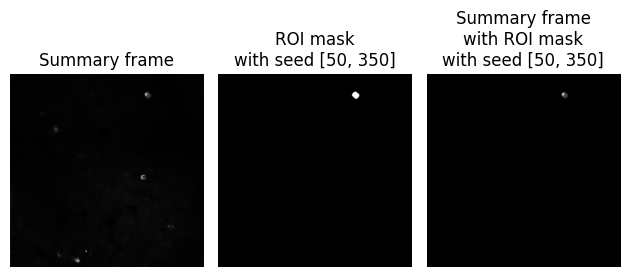

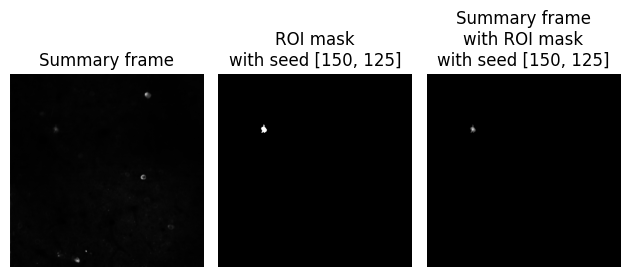

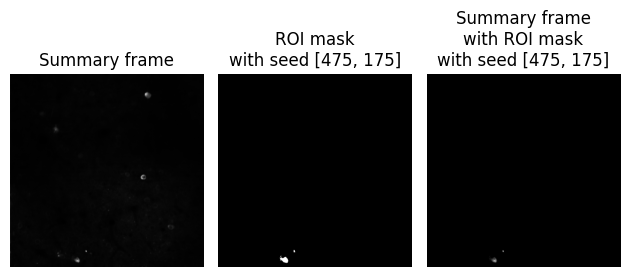

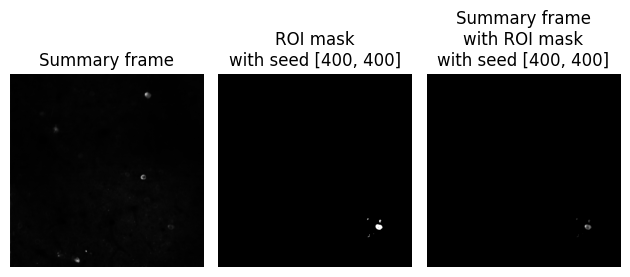

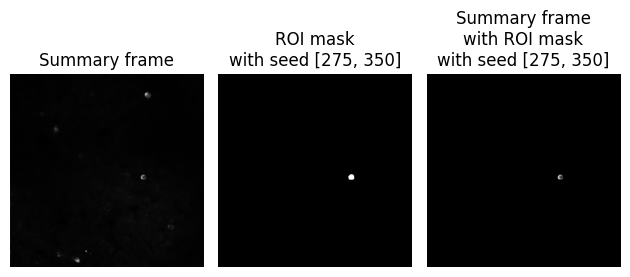

In [5]:
# Load problem function
from ssanch27_problem_3_exercise_1 import run_problem_3

# Run problem function
rois = run_problem_3(variance_frame)

- Part A)

We can see the 5 ROIs multiplied by the summary frame. The seeds were chosen by visual inspection of the animation of problem 1 (adjusting for the movement on the summary frame plot of problem 2), and trial and error. Due to the grayscale visualization of the images, it might not be as clear as if I were using a different coloramap, but at each of the previous subplot the 1st and 3rd images are grayscale (different intensities of the summary value, in the 3rd one being 0 outside of the ROI), and the 2nd image is binary (so white and black). If you notice, you can see the difference in grayscale values that makes the 2nd and 3rd images different.

- Part B)

To assess how good my script was, I plotted each ROI imposed at the summary value by the side of the summary frame. That way, and looking around the area of the seed for that ROI, you can see if the ROI included the totality of your cell that displays activation and also avoid getting additional cells (in most of the ROIs that is the case, maybe on the 3rd one a really small cluster was added into the ROI besides the one of interest).

To have a better assessment of how good my script was, that same visual inspection method could be done, instead of by myself, by an expert who will give a better evaluation of the results. Other methods to test if my script works as intended would be to test a higher number of seeds, change the parameters of my code (ROI max length and threshold) and compute statistics (accuracy, F1, etc.) of all of the results. That way, I can see if my method is robust with parameter changes if the method works better with another set of default parameters, etc.

Additionally, one might think of more complex assessment methods, especially automatic ones that don't require human decision, that might be constructed on the previous idea (testing more seeds with different parameters and computing success/failure statistics, although that might need to create by hand labels for those iterations).

# PROBLEM 4

PART A
Doing plots of ROI #1


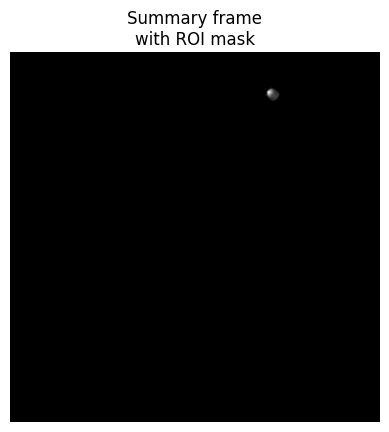

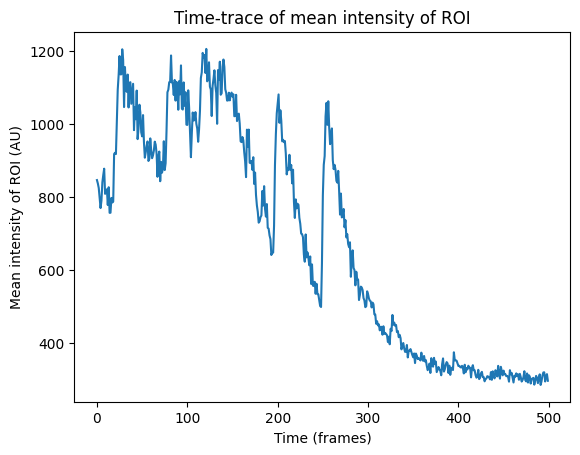

Doing plots of ROI #2


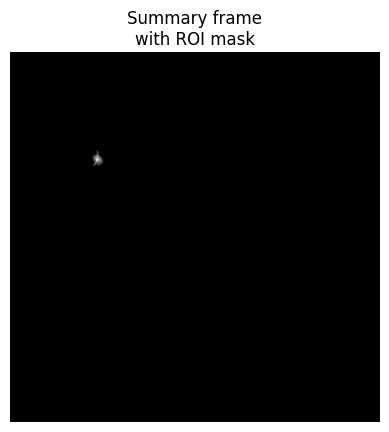

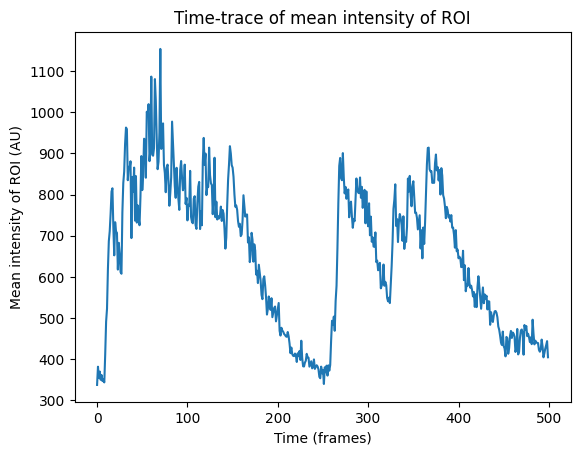

Doing plots of ROI #3


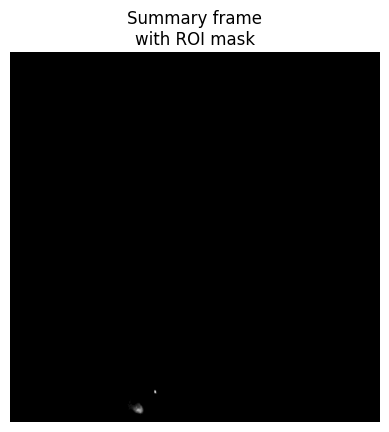

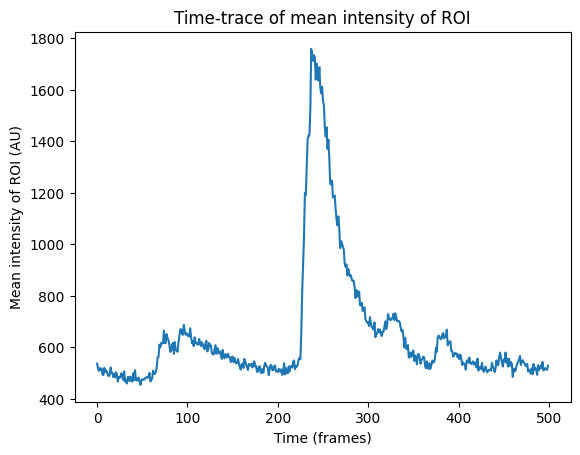

Doing plots of ROI #4


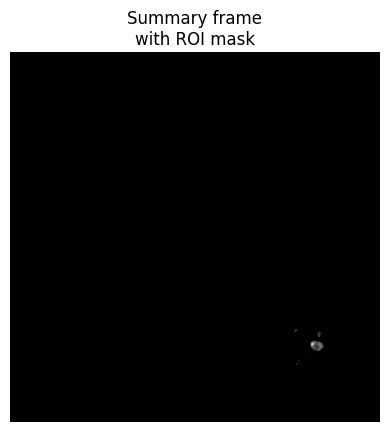

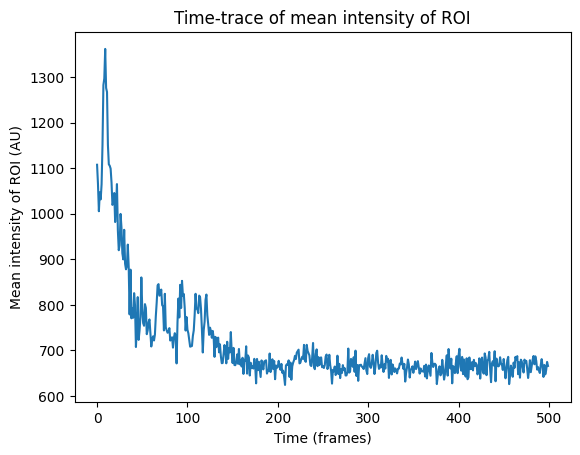

Doing plots of ROI #5


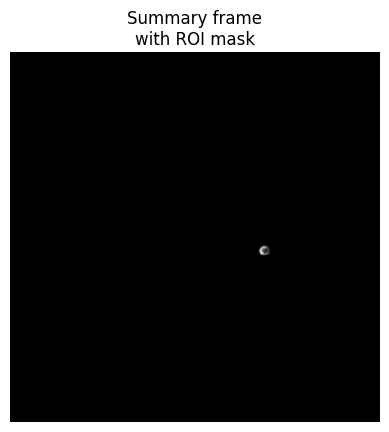

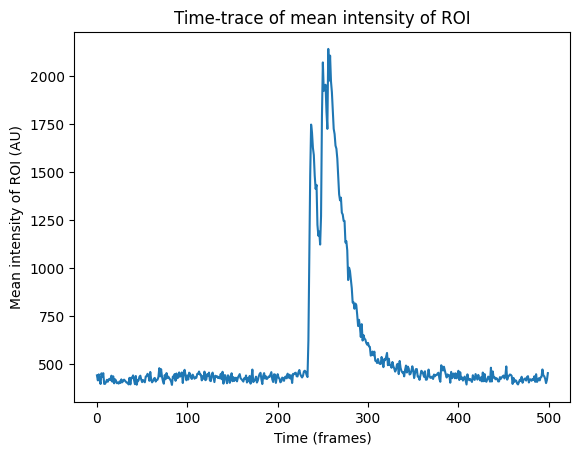

In [6]:
# Load problem function
from ssanch27_problem_4_exercise_1 import run_problem_4

# Run problem function
run_problem_4(np_file_2, rois, variance_frame)

- Part A)

My approach consists of getting the average intensity (pixel value) inside of the ROI for each frame and saving that value as the value for that frame in the time-trace of the ROI.

Given that the ROI is a binary mask, you can get easily the information you need without having to take into account the ROI position in the indexes of the numpy arrays when doing operations.

For the sum of all intensities inside the ROI, you can multiply the ROI by the frame, so that all intensities outside of the ROI are 0, so for the sum you only count the pixels inside of the ROI.

For the number of pixels inside of the ROI, given that is a binary mask, you can just count the number of Trues inside your ROI numpy array (as the pixels outside of the ROI will be considered Falses by the mask).

From there, you can easily get the average across the ROI by dividing the total intensity by the number of pixels in ROI, and you do that at each frame, at each ROI, and you create time-traces for each ROI of the mean intensity per frame.

Although there exist some methods that might be less computationally expensive (directly take the mean of the ROI area), for this case the .tiff file has a low resolution (500x500) and a low number of samples (500) this is fast enough. Maybe for larger collections of data, it might be interesting to optimize the code.

- Part B)

I think the time-traces DO in fact reflect the actual activity of the video because you are looking at the rate of change in intensity in the areas of the frame that you have identified previously as areas with cell activation at some point in the video. With this method, you are able to view that change over frames and see where a peak appears, marking the part with cell activation.

Additionally, looking at the time-traces created, we can see how there is a baseline and a period when the activity gets orders of magnitude above that baseline (when cell activation happens). This can be seen more easily in the 3rd or 5th ROI presented. If our outputs hadn't shown a clear region of activation against a baseline on the rest of the video, you could think that maybe the time-trace wasn't capturing correctly the activity, but it seems like the code is doing what we expected it to.

To test it, one can easily perform the animation on task 1 for the .tiff file without movement, and see how the activation changes by visual inspection at each region, and comparing it with the time-traces created, seeing if what you consider as activation from the time-traces (at which frames you can see it) corresponds to the actual activation you see in the video.

Another way of testing is to see if the different cells have some sort of grouped activity. Seeing the time-traces we can see basically 2 patterns: activation levels changing at the middle of the video, or at the beginning (or a combination of both). The 1st ROI exhibits activation in the beginning that stops at the middle, the 2nd ROI exhibits activation around every moment except the middle, the 3rd ROI exhibits activation only at the middle, the 4th ROI exhibits activation only at the beginning, the 5th ROI exhibits activation only at the middle. The fact that a low-dimensionality series of events (something happening and the beginning and in the middle), or a combination of those events, can modulate the activity (in an approximate way, not exact) of all cells, shows that you might be looking correctly at the activation in the time-trace, as you are seeing coordination, something that happens on real data. We will discuss more of these underlying processes in the next problem.

Still, I believe that visual inspection with the animation of the file is the most simple and straightforward method to assess the accuracy of the time-traces created.

# PROBLEM 5

Shape of vectorized matrix: (250000, 500)

Part A
Beginning iteration of PCA with 2 principal components
Shape of output of this iteration of PCA: (2, 500)


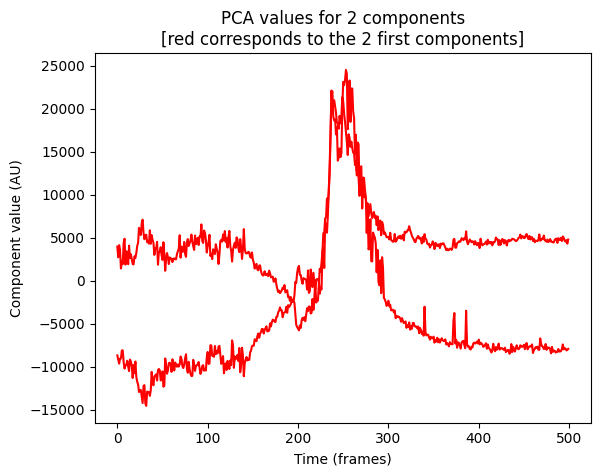

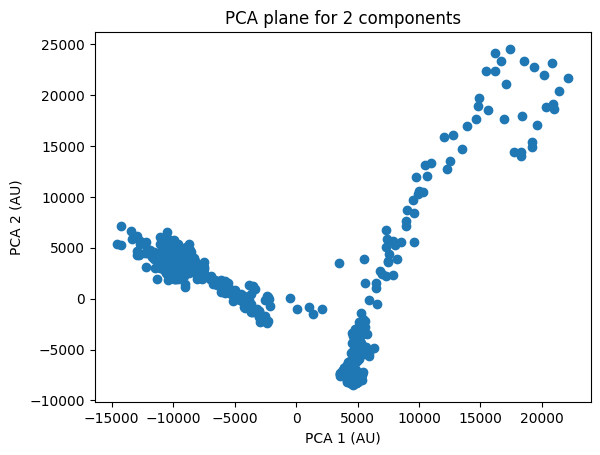

Beginning iteration of PCA with 4 principal components
Shape of output of this iteration of PCA: (4, 500)


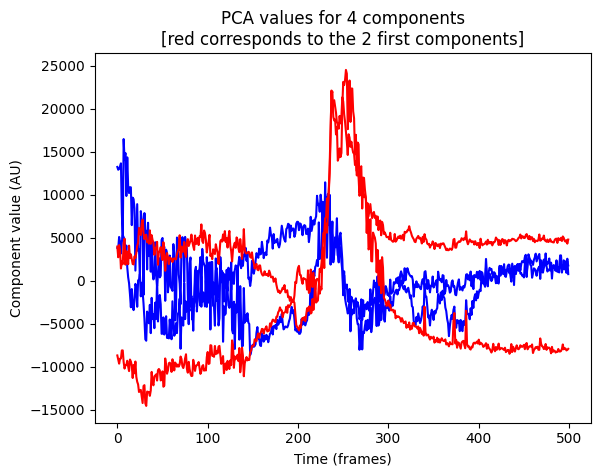

Beginning iteration of PCA with 8 principal components
Shape of output of this iteration of PCA: (8, 500)


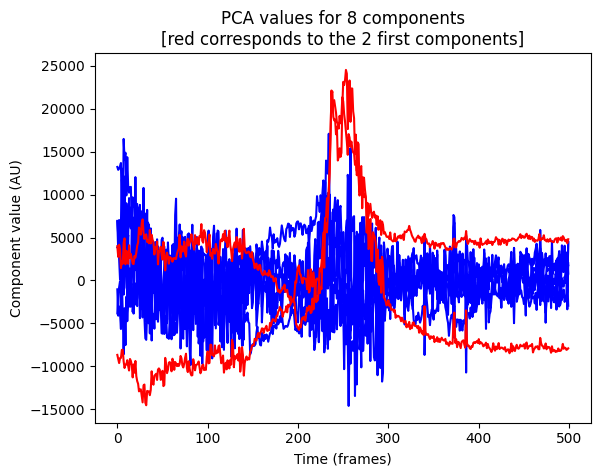


Part B
This part takes a couple of minutes to execute do the high number of iterations set in the NMF model to assure it converges.
Locally it takes 1 minute, but in Colab it can take around 5 minutes


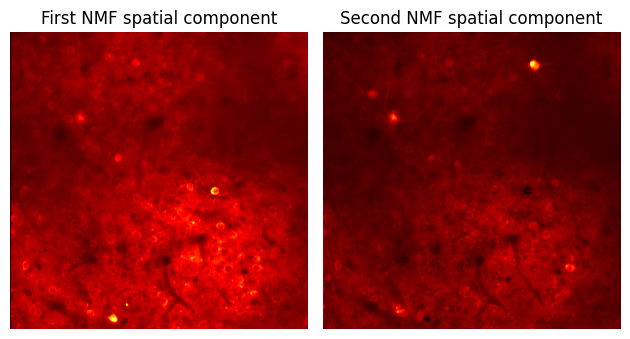

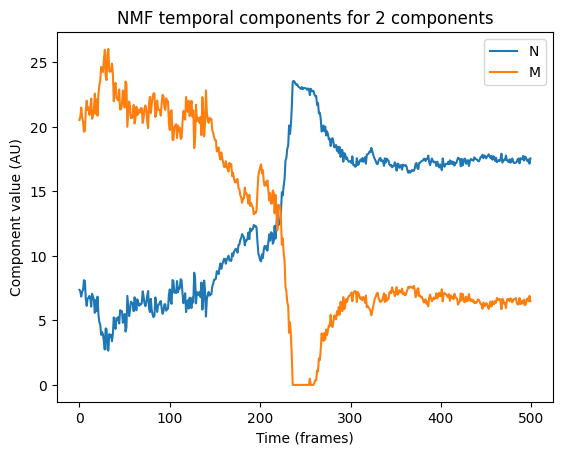

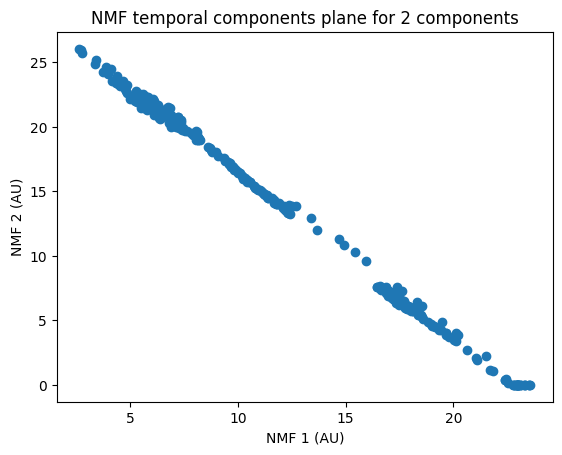


Part C


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


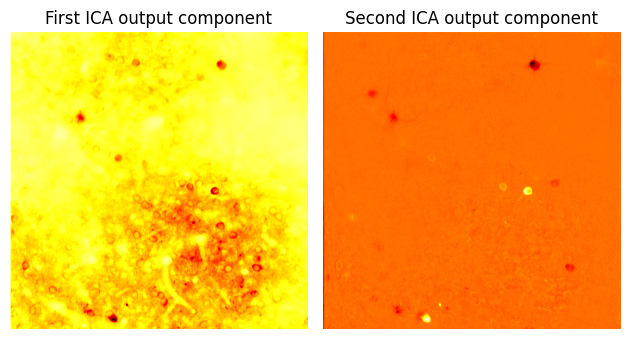

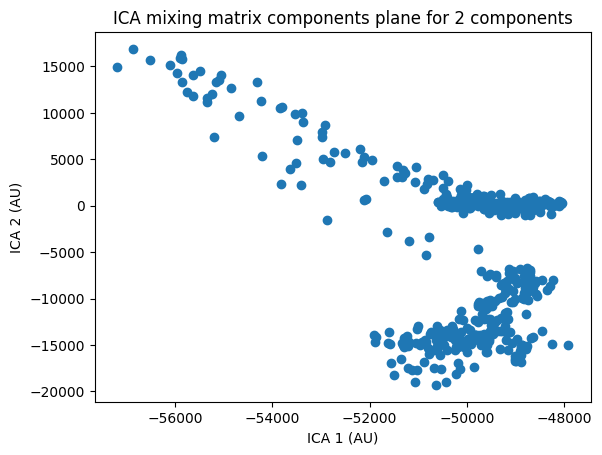

In [7]:
# Load problem function
from ssanch27_problem_5_exercise_1 import run_problem_5

# Run problem function
run_problem_5(np_file_2)

- Part A)

From seeing the time-traces of each component for different PCA iterations, as well as the initial PCA plane (for visual clustering) of all frames, we can see how the result changes with the number of principal components that are shown.

Choosing 2 components (because of the 2 events identified in the previous problem) as the starting point, you can see how the data can be more or less described in that way. If you look at the frames in which each component has a significant absolute value, you can see higher activity both around the beginning and in the middle, which relates to the previous explanation of problem 4.

However, when you raise the components to 4, you can see that even if most of the added information doesn't have a strong absolute value, some of the new components have relevant information around the beginning of the video (that can aid in explaining better the data).

When you raise the components to 8, you don't see much new information that you didn't have with fewer components (either the peaks at the beginning and in the middle that we already saw with fewer components or less significant information around the [5000, -5000] range).

To sum up, although the data description that you can have with different PCAs with different numbers of components changes (being more detailed with more components), in this specific case it seems like the most important events that modulate cell activation over frames can be captured with a lower number of principal components.

Although we could have included this section's spatial representations as in the next NMF and ICA parts, I considered it better to only do the PCA results on time-series, to visualize how the data we have to model each frame changes as I increase the number of components (on the other analysis the number of components is fixed), so that is why here we are not focusing on the spatial information we could get form the PCA, as also that is not the main use of the technique.

- Part B)

From NMF, we can see spatial information for the number of components chosen (2 again, because of the same reasons), as well as temporal information, or at least that is the idea.

The difference that I note at each spatial component is that in the component some of the regions we have chosen before exhibit a larger intensity at one of the components, but not in the other. If we go back to the definition of each ROI, and the time-traces with the definition of the time-trace (when the activity was happening due to an event in the beginning or in the middle), it is easy to group the ROIs by that activity (either you are modulated by an activity at the beginning, at the middle, or a mixture of the two).

That translates directly to the spatial analysis of the NMF data with 2 components, as we can see how 1 component corresponds to the changes over frames spatially due to 1 event (which includes the ROIs that were dependent on that event, and the ones that were dependent on both), and the same thing for the other event and the other component. As a matter of fact, you can even see when a cell gets inhibited instead of excited by the event by seeing if the spot is bright or black.

I've tried to get temporal information from the 2 components for the 2 events (similar to PCA) based on the model components rather than on the transformed data, and we can see how those 2 temporal components reflect the same pattern, just inverted. So from here, I can get 1 temporal component information as the other is the same one inverted (we can check this by plotting in a plane both components, as did in the code). In the one component of information we see the expected event at the middle, and a significantly lower level at the beginning, capturing the information from both events as they happened across different frames.

The difference I note is that this method is able to give proper information on how those events appear spatially, whereas the PCA only gives temporal information. The non-negative (always addition) part of this method helps in capturing that spatial information better. As in PCA, the rank of decomposition is very significant in the overall results. If the rank is low, you might underfit your data, if the rank is high, you might overfit your data. In the end is a trade-off of making your data fit a lower-dimensionality system, but without removing crucial information (or the other way around giving too much information to find the essential process that mostly defines your data).

- Part C)

For ICA, we are more focused on see what are the individual patterns that define our data, as we want to focus on the generators of information that are important to our data (the 2 main events that define cell activation), and ignore the other sources (we considered them background noise).

Again, we choose 2 as the number of components for analysis, and we proceed with the analysis. Spatially, we see similar results to NMF (the two processes that model the different ROIs we have studied), but overall I think this creates a clearer map of each event/feature, as it removes better background information, changing mostly in the factor of change, which is what we want to focus on.

I would say in this case the 1st component is showing general changes (not necessarily related to cell activation), and the 2nd component is isolating the source of information that comes with cell activation, giving us the clearest reference frame on this section on which parts of the frame are showing cell activation.

In my opinion, the second component result of the ICA is the best approach to what we wanted from this section: remove the necessity of a summary image and get a more suitable starting point for ROI selection.

Although you could have that information if you get the spatial plots for PCA (in that cell I explained why I didn't provide them, as we were focusing on seeing the change in addition of information from different numbers of components used), or by looking at the spatial components of NMF (which focused more on one event of activation and the other), this method provides a better approach to isolate in one component cell activation, and making a clear reference image to get the ROIs from.

In the matrix component plane for the ICA with 2 components, you can easily differentiate one cluster that doesn't show cell activation (as they have a lower 2nd component) and another that has activation. From there, we can get not only the spatial information on where in the frame we are seeing cell activation but also at which frames (if the frame gets in the cluster of frames with activation or not).

In my opinion, we can see the clearest analysis from the results of this method out of the 3 (at least for the purpose of removing the need for summary frames, and by the way that I have analyzed the data).

<div align="center">

| Method   | Results |
| -------- | ------- |
| PCA  | Great way to see what a is the number of processes that define your data (temporal information)   |
| NMF | See the spatial information of the 2 frames that define your data (event in the beginning and in the middle)     |
| ICA    | Get most clear substitute to summary frame from getting a spatial map from a source of information defined as cell activation (removing background and leaving frame with significant values on cell that at some point get activated)    |
</div>